In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

data_name = "breast"
training_type = ['individial_layers', 'exchange_layers','training_exchange_layers', 'training_exchange_layers_e', 'no_individial_layers', 'no_exchange_layers', 'one_individial_layers']
algorithm = 'qdpso'
tipe = ["training", "test", "val"]

# Training

Individual Layer time (second):  322.7434914000005

Individual Exchange Layer time (second):  321.9524774999991

Concurrence Iter layer Exchange time (second):  258.26136550000047

Concurrence Iter layer and Layer Exchange time (second):  257.1356844000002

Individual Layer time (second):  252.3933494999983

NO Individual Layer time (second):  273.8936168

Individual Exchange Layer time (second):  269.90156209999986

Concurrence Iter layer Exchange time (second):  259.71733200000017

Concurrence Iter layer and Layer Exchange time (second):  254.66318390000015

In [55]:
execution_time_ind = np.load(f"../output/{training_type[0]}/{data_name}/{data_name}_start_end_execution_time.npy")
execution_time_ex = np.load(f"../output/{training_type[1]}/{data_name}/{data_name}_start_end_execution_time.npy")
execution_time_ex_c = np.load(f"../output/{training_type[2]}/{data_name}/{data_name}_start_end_execution_time.npy")
execution_time_ex_c_ex = np.load(f"../output/{training_type[3]}/{data_name}/{data_name}_start_end_execution_time.npy")
execution_time_nind = np.load(f"../output/{training_type[4]}/{data_name}/{data_name}_start_end_execution_time.npy")
execution_time_exn = np.load(f"../output/{training_type[5]}/{data_name}/{data_name}_start_end_execution_time.npy")
execution_time_one = np.load(f"../output/{training_type[6]}/{data_name}/{data_name}_start_end_execution_time.npy")

print("ONE Individual Layer time (second): ", execution_time_one[2])
print("Individual Layer time (second): ", execution_time_ind[2])
print("NO Individual Layer time (second): ", execution_time_nind[2])
print("Individual Exchange Layer time (second): ", execution_time_ex[2])
print("NO Individual Exchange Layer time (second): ", execution_time_exn[2])
print("Concurrence Iter layer Exchange time (second): ", execution_time_ex_c[2])
print("Concurrence Iter layer and Layer Exchange time (second): ", execution_time_ex_c_ex[2])

ONE Individual Layer time (second):  244.01784769999995
Individual Layer time (second):  247.2752533999992
NO Individual Layer time (second):  270.31752849999975
Individual Exchange Layer time (second):  253.3112390000001
NO Individual Exchange Layer time (second):  274.63754690000496
Concurrence Iter layer Exchange time (second):  259.71733200000017
Concurrence Iter layer and Layer Exchange time (second):  254.66318390000015


In [56]:
def add_summary_data(df_combined, training_types, tipe):
    """Agrega datos de resumen a un diccionario de datos."""    
    # Dependiendo del 'tipe', establecer la clave del diccionario
    if tipe == "training":
        key = 'Training'
    elif tipe == "test":
        key = 'Testing'
    else:
        key = 'Validation'    
    # Inicializar el diccionario con la clave y los estadísticos que se calcularán
    data = {key: ['Average', 'Std', 'Best', 'Worst']}    
    # Iterar a través de cada tipo de entrenamiento y llenar el diccionario
    for training_type in training_types:
        data[training_type] = [
            df_combined[training_type].mean(),
            df_combined[training_type].std(),
            df_combined[training_type].min(),
            df_combined[training_type].max()
        ]    
    return data

def extract_data_from_file(filename, data_type):
    """
    Extrae datos de un archivo CSV.
    Parámetros:
        filename (str): Nombre del archivo CSV.
        data_type (str): Tipo de datos a extraer ('training', 'test' o 'validation').
    Retorno:
        numpy.ndarray: Array con los datos extraídos.
    """    
    df = pd.read_csv(filename)    
    # Definir el prefijo basado en el tipo de datos
    if data_type == 'training':
        prefix = 'total_training'
    elif data_type == 'test':
        prefix = 'total_test'
    elif data_type == 'val':
        prefix = 'total_val'
    else:
        raise ValueError("Invalid data_type. Choose from 'training', 'test', or 'val'.")    
    return df[df['Layer'].str.startswith(prefix)]['Duration (seconds)'].values

In [57]:
def visualize_training_combined_table(training_types, data_name, algorithm, tipe):
    # Crear un diccionario para albergar los datos
    data = {'Training': []}
    
    # Para cada tipo de entrenamiento, extraer y agregar los datos de entrenamiento al diccionario
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[0]}_time.csv' 
        durations = extract_data_from_file(file_path, tipe[0])
        
        # Si la lista 'Training Iteration' está vacía, llenarla con los números de iteración
        if not data['Training']:
            data['Training'] = [f'Training {i+1}' for i in range(len(durations))]
        
        data[training_type] = durations

    # Crear el DataFrame
    df_combined = pd.DataFrame(data)
    
    # Crear un DataFrame para "Average", "Std", "Best", y "Worst"
    summary_data = add_summary_data(df_combined, training_types, tipe[0])
    df_summary = pd.DataFrame(summary_data)

    # Concatenar el DataFrame original con el resumen
    df_combined = pd.concat([df_combined, df_summary], ignore_index=True)
    
    # Mostrar el DataFrame
    display(df_combined)

visualize_training_combined_table(training_type, data_name, algorithm, tipe)

,Training,individial_layers,exchange_layers,training_exchange_layers,training_exchange_layers_e,no_individial_layers,no_exchange_layers,one_individial_layers
0,Training 1,16.389203,16.944477,17.087130,16.829790,17.975266,18.173538,16.247702
1,Training 2,16.427136,17.067354,16.992072,16.787526,18.045023,18.366099,16.291221
2,Training 3,16.539240,16.731332,17.010184,16.702530,17.974524,18.285046,16.282301
3,Training 4,16.535802,17.008169,17.574029,16.771455,17.994630,18.291688,16.251966
4,Training 5,16.475751,17.153125,17.464761,17.016586,18.024121,18.291280,16.275666
5,Training 6,16.511282,17.039787,17.709553,16.813283,18.031876,18.259113,16.246349
6,Training 7,16.458480,17.274485,17.144422,16.735687,18.076201,18.330368,16.275179
7,Training 8,16.433322,17.322254,17.209511,16.849448,17.994283,18.345329,16.289626
8,Training 9,16.484192,16.831920,17.022397,16.866339,18.002645,18.411941,16.251603
9,Training 10,16.590036,16.654796,17.133772,17.001726,18.014658,18.287213,16.277264


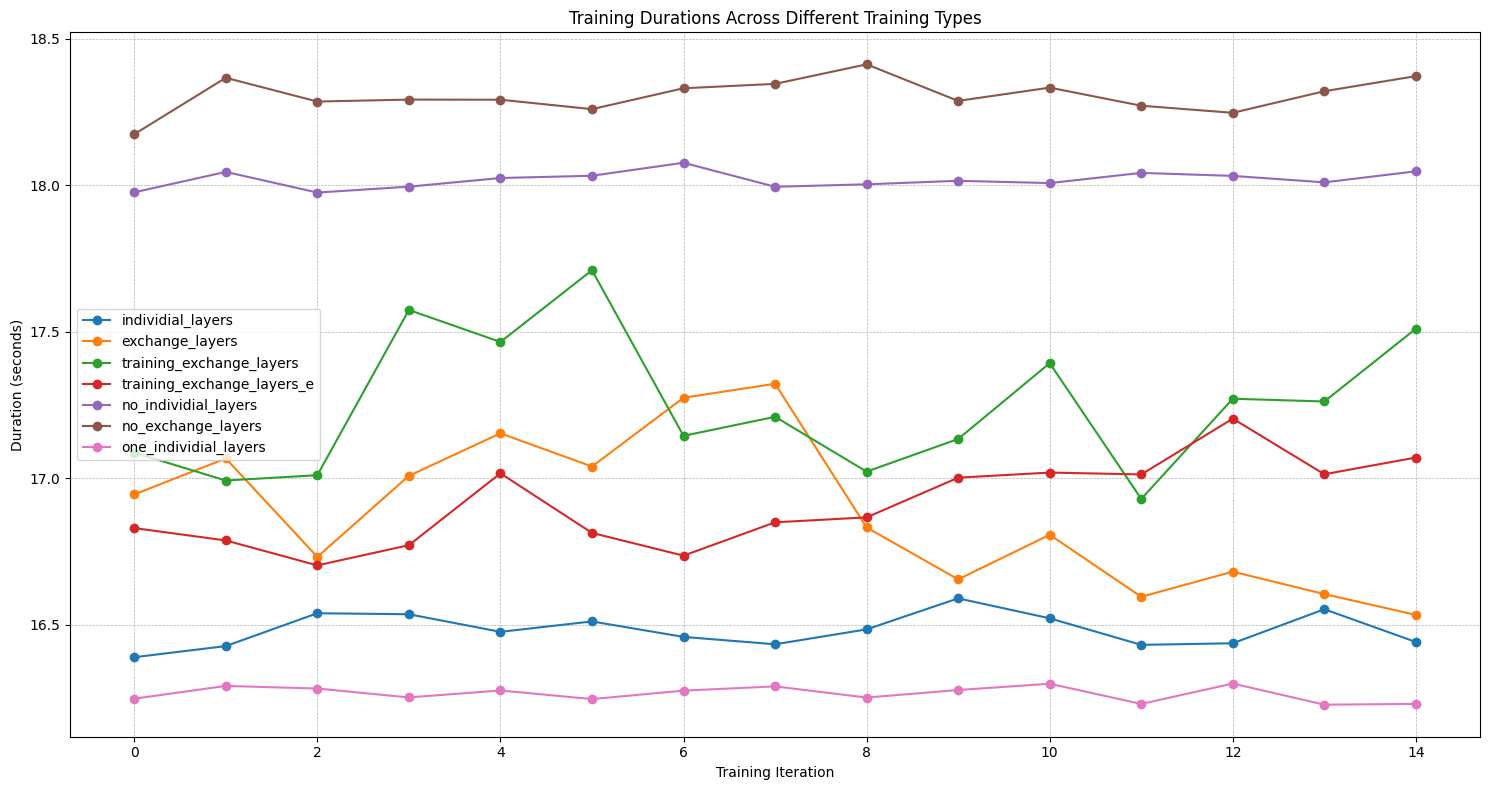

In [58]:
def visualize_training_graph(training_types, data_name, algorithm, tipe):
    # Crear un gráfico
    plt.figure(figsize=(15, 8))
    
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[0]}_time.csv'
        durations = extract_training_data_from_file(file_path)
        
        plt.plot(durations, label=training_type, marker='o')
        
    plt.title('Training Durations Across Different Training Types')
    plt.xlabel('Training Iteration')
    plt.ylabel('Duration (seconds)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

visualize_training_graph(training_type, data_name, algorithm, tipe)

# Testing

In [59]:
def visualize_testing_combined_table(training_types, data_name, algorithm, tipe):
    # Crear un diccionario para albergar los datos
    data = {'Testing': []}
    
    # Para cada tipo de entrenamiento, extraer y agregar los datos de testeo al diccionario
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[1]}_time.csv'  # Utilizamos tipe[1] aquí
        durations = extract_data_from_file(file_path, tipe[1])
        
        # Si la lista 'Testing Iteration' está vacía, llenarla con los números de iteración
        if not data['Testing']:
            data['Testing'] = [f'Testing {i+1}' for i in range(len(durations))]
        
        data[training_type] = durations

    # Crear el DataFrame
    df_combined = pd.DataFrame(data)
    
    # Crear un DataFrame para "Average", "Std", "Best", y "Worst"
    summary_data = add_summary_data(df_combined, training_types, tipe[1])
    df_summary = pd.DataFrame(summary_data)

    # Concatenar el DataFrame original con el resumen
    df_combined = pd.concat([df_combined, df_summary], ignore_index=True)
    
    # Mostrar el DataFrame
    display(df_combined)

visualize_testing_combined_table(training_type, data_name, algorithm, tipe)


,Testing,individial_layers,exchange_layers,training_exchange_layers,training_exchange_layers_e,no_individial_layers,no_exchange_layers,one_individial_layers
0,Testing 1,0.000610,0.000603,0.000415,0.000471,0.000486,0.000553,0.000502
1,Testing 2,0.000523,0.000414,0.000443,0.000440,0.000507,0.000540,0.000557
2,Testing 3,0.000486,0.000460,0.000445,0.000428,0.000461,0.000523,0.000536
3,Testing 4,0.000539,0.000527,0.000492,0.000412,0.000520,0.000483,0.000520
4,Testing 5,0.000526,0.000538,0.000441,0.000434,0.000514,0.000531,0.000452
5,Testing 6,0.000527,0.000525,0.000464,0.000465,0.000525,0.000496,0.000469
6,Testing 7,0.000519,0.000561,0.000415,0.000420,0.000468,0.000481,0.000474
7,Testing 8,0.000519,0.000494,0.000440,0.000409,0.000498,0.000462,0.000520
8,Testing 9,0.000529,0.000532,0.000371,0.000414,0.000489,0.000460,0.000482
9,Testing 10,0.000503,0.000500,0.000422,0.000487,0.000506,0.000521,0.000482


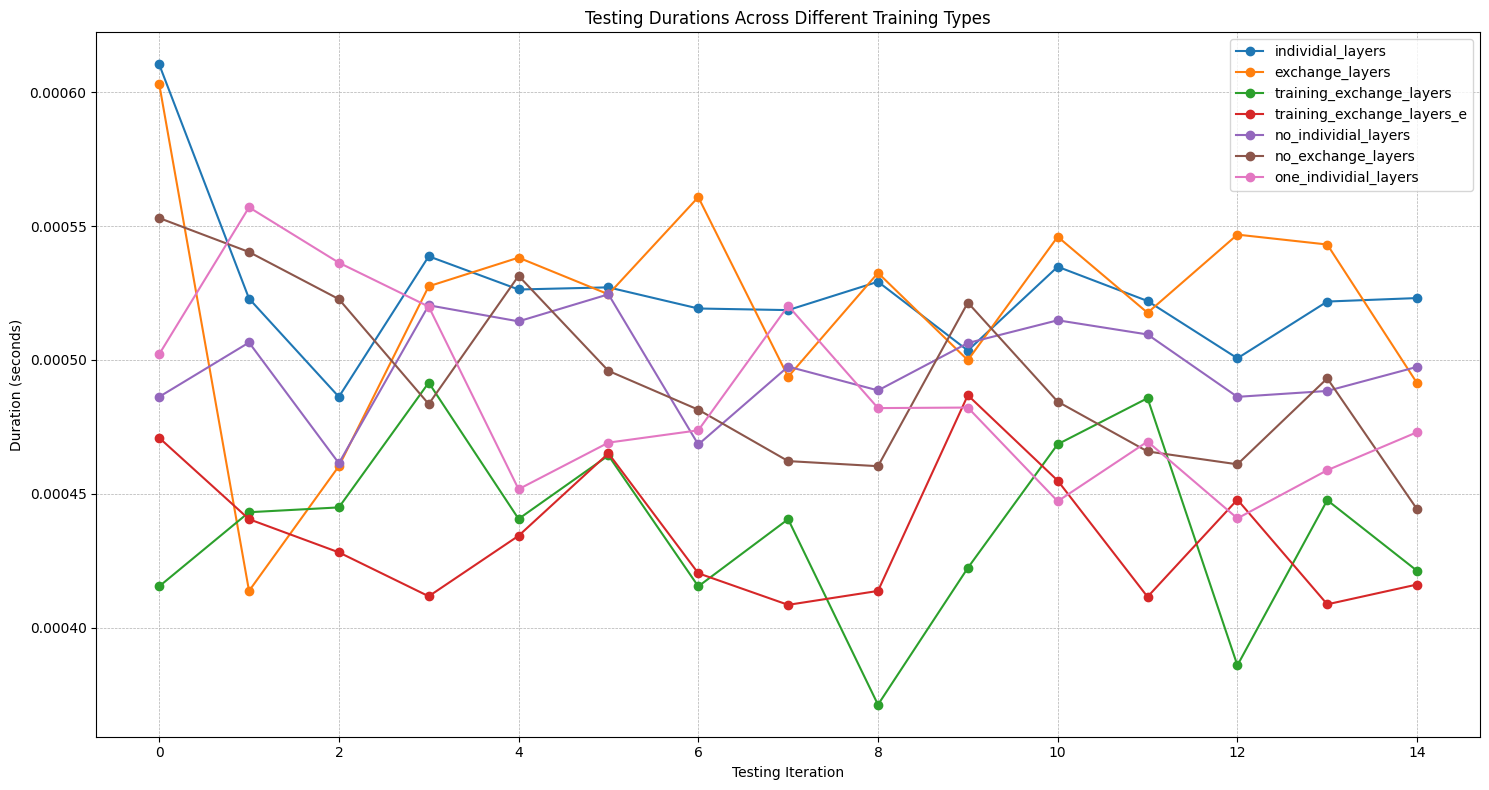

In [60]:
def visualize_testing_graph(training_types, data_name, algorithm, tipe):
    # Crear un gráfico
    plt.figure(figsize=(15, 8))
    
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[1]}_time.csv'
        durations = extract_testing_data_from_file(file_path)
        
        plt.plot(durations, label=training_type, marker='o')
        
    plt.title('Testing Durations Across Different Training Types')
    plt.xlabel('Testing Iteration')
    plt.ylabel('Duration (seconds)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

visualize_testing_graph(training_type, data_name, algorithm, tipe)

# Validation

In [61]:
def visualize_validation_combined_table(training_types, data_name, algorithm, tipe):
    # Crear un diccionario para albergar los datos
    data = {'Validation': []}
    
    # Para cada tipo de entrenamiento, extraer y agregar los datos de validación al diccionario
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[2]}_time.csv'  # Utilizamos tipe[2] aquí
        durations = extract_data_from_file(file_path, tipe[2])
        
        # Si la lista 'Validation Iteration' está vacía, llenarla con los números de iteración
        if not data['Validation']:
            data['Validation'] = [f'Validation {i+1}' for i in range(len(durations))]
        
        data[training_type] = durations

    # Crear el DataFrame
    df_combined = pd.DataFrame(data)
    
    # Crear un DataFrame para "Average", "Std", "Best", y "Worst"
    summary_data = add_summary_data(df_combined, training_types, tipe[2])
    df_summary = pd.DataFrame(summary_data)

    # Concatenar el DataFrame original con el resumen
    df_combined = pd.concat([df_combined, df_summary], ignore_index=True)
    
    # Mostrar el DataFrame
    display(df_combined)

visualize_validation_combined_table(training_type, data_name, algorithm, tipe)



,Validation,individial_layers,exchange_layers,training_exchange_layers,training_exchange_layers_e,no_individial_layers,no_exchange_layers,one_individial_layers
0,Validation 1,0.000128,0.000130,0.000140,0.000129,0.000168,0.000138,0.000156
1,Validation 2,0.000131,0.000123,0.000139,0.000121,0.000124,0.000121,0.000155
2,Validation 3,0.000118,0.000127,0.000119,0.000128,0.000138,0.000135,0.000129
3,Validation 4,0.000121,0.000127,0.000133,0.000141,0.000115,0.000136,0.000171
4,Validation 5,0.000115,0.000117,0.000208,0.000118,0.000132,0.000136,0.000119
5,Validation 6,0.000118,0.000126,0.000118,0.000115,0.000114,0.000130,0.000123
6,Validation 7,0.000126,0.000123,0.000119,0.000131,0.000152,0.000118,0.000114
7,Validation 8,0.000126,0.000121,0.000113,0.000123,0.000136,0.000132,0.000114
8,Validation 9,0.000133,0.000127,0.000130,0.000142,0.000133,0.000155,0.000110
9,Validation 10,0.000125,0.000116,0.000122,0.000131,0.000114,0.000118,0.000110


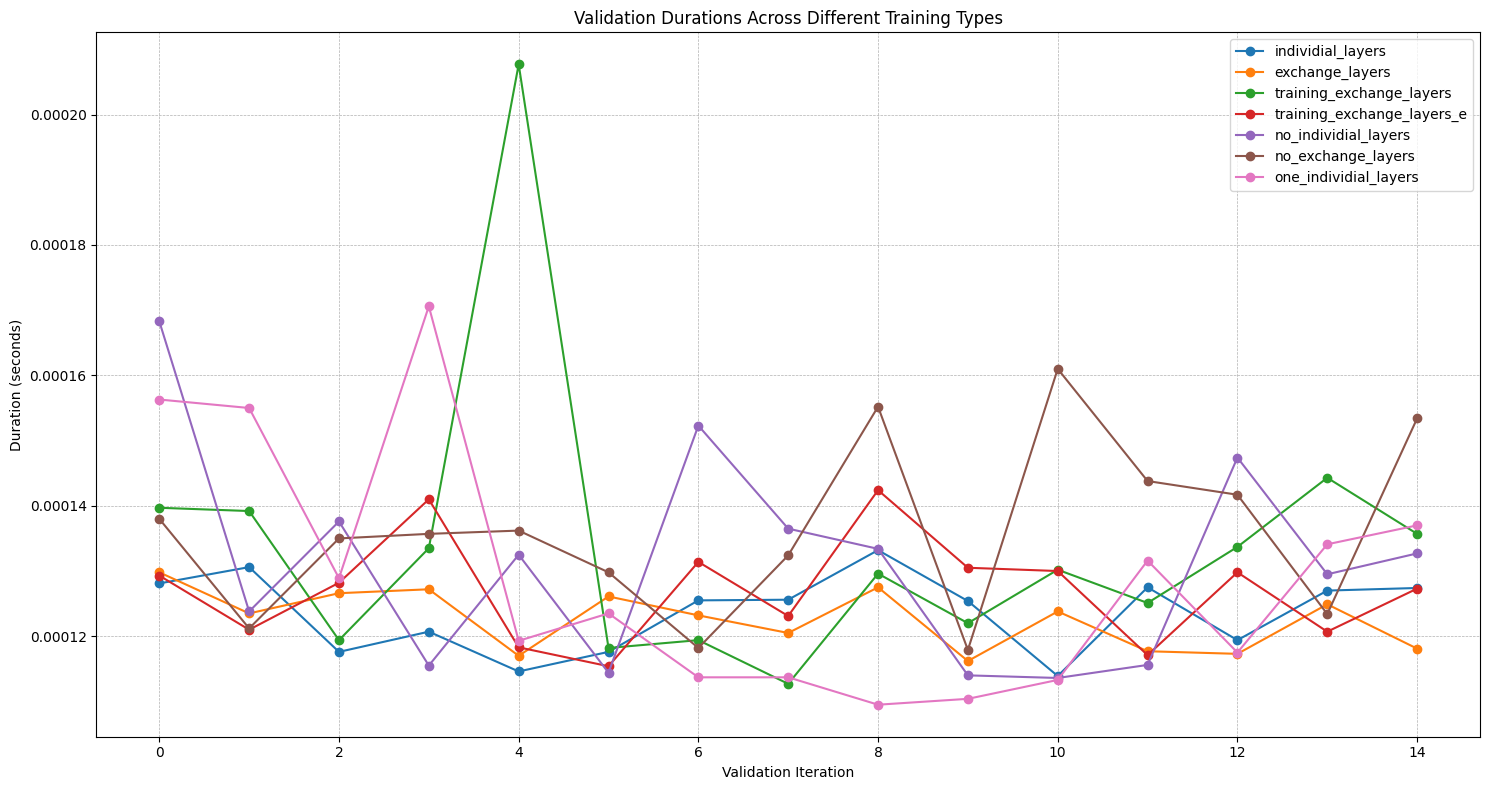

In [62]:
def visualize_validation_graph(training_types, data_name, algorithm, tipe):
    # Crear un gráfico
    plt.figure(figsize=(15, 8))
    
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[2]}_time.csv'
        durations = extract_validation_data_from_file(file_path)
        
        plt.plot(durations, label=training_type, marker='o')
        
    plt.title('Validation Durations Across Different Training Types')
    plt.xlabel('Validation Iteration')
    plt.ylabel('Duration (seconds)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

visualize_validation_graph(training_type, data_name, algorithm, tipe)
